In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import time

In [2]:
adata = sc.datasets.paul15()

C:\Anaconda3\lib\site-packages\scanpy\datasets\_datasets.py:200: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['iroot'] = 840


In [3]:
# Select top 1000 highly-variable genes
filter_result = sc.pp.filter_genes_dispersion(adata.X,flavor='cell_ranger',n_top_genes=1000,log=False)
# Subset the genes
adata = adata[:, filter_result.gene_subset]
# Log transformation and scaling
sc.pp.log1p(adata)

C:\Anaconda3\lib\site-packages\scanpy\preprocessing\_simple.py:372: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [4]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.diffmap(adata)
sc.tl.dpt(adata)

C:\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


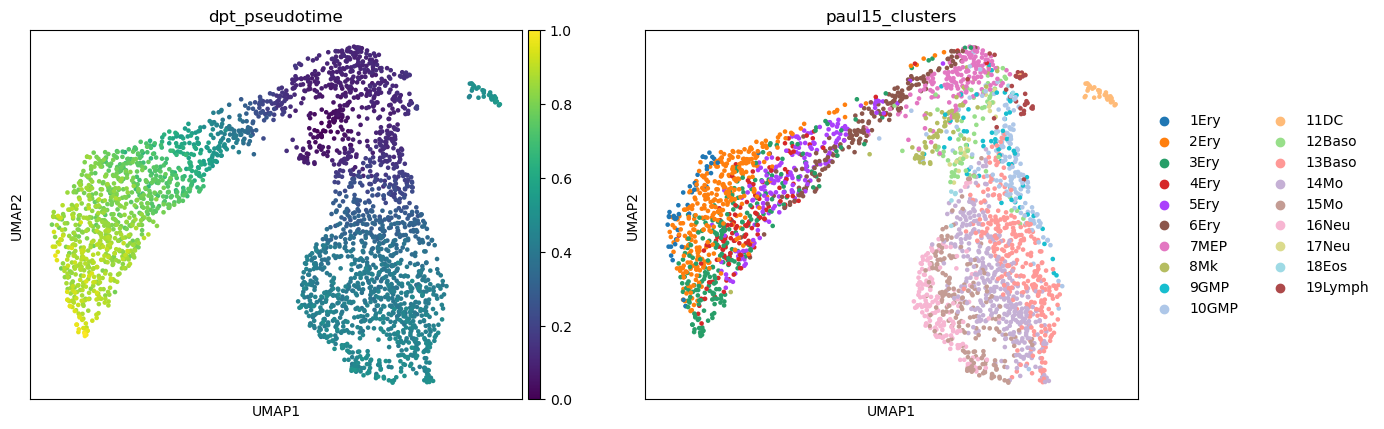

In [5]:
sc.tl.umap(adata)
sc.pl.umap(adata, color=['dpt_pseudotime', 'paul15_clusters'])

In [6]:
data_clusters = adata.obs['paul15_clusters']
zip_types = dict(zip(data_clusters.cat.categories,adata.uns['paul15_clusters_colors']))
cell_clusters  =  [zip_types[i] for i in data_clusters.values]

In [7]:
pd.DataFrame(cell_clusters).to_csv("paul.cluster_color.csv")

In [8]:
data_clusters_labels = adata.obs['paul15_clusters'].cat.categories
pd.DataFrame(data_clusters_labels).to_csv("paul.cluster_categories.csv")

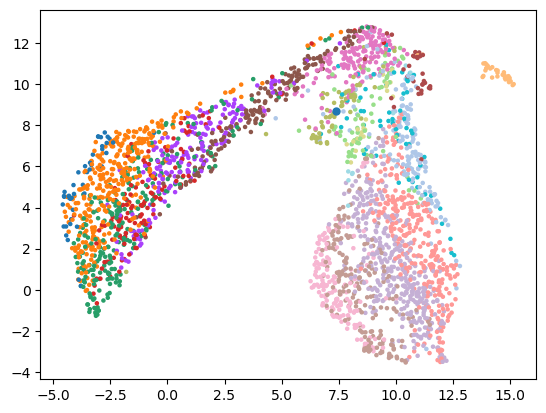

In [9]:
iroot = adata.uns['iroot']
X_umap = adata.obsm['X_umap']
dpt_pseudotime = adata.obs['dpt_pseudotime'].values
iroot = adata.uns['iroot']
plt.scatter(X_umap[:,0],X_umap[:,1],c=cell_clusters,s = 5)
plt.scatter(X_umap[iroot,0],X_umap[iroot,1],s = 25)

In [10]:
pd.DataFrame(dpt_pseudotime).to_csv('paul.dpt_pseudotime.csv')

In [11]:
sc.external.tl.palantir(adata,use_adjacency_matrix=False,n_components=20,knn=10)
pal_res = sc.external.tl.palantir_results(adata,early_cell=adata.obs_names[iroot]) # ,num_waypoints = 2000
pal_res.pseudotime.to_csv('paul.palantir_pseudotime.csv')

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Determing nearest neighbor graph...
Sampling and flocking waypoints...
Time for determining waypoints: 0.003416132926940918 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.17218914826711018 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9996
Correlation at iteration 2: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [12]:
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'DeJavu Serif'
# plt.rcParams['font.serif'] = ['Times New Roman']
%matplotlib inline

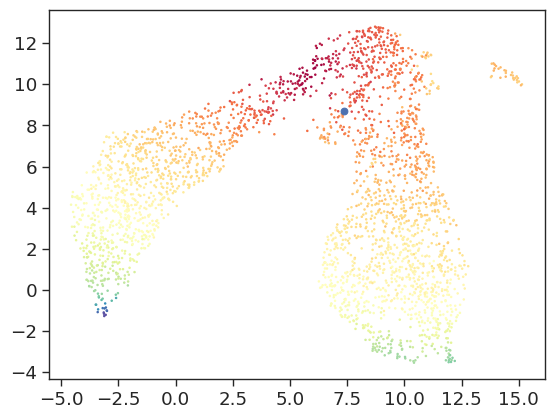

In [13]:
umap = adata.obsm['X_umap']
plt.scatter(umap[:,0], umap[:,1], c=pal_res.pseudotime.values,s=1,cmap='Spectral')
plt.scatter(umap[840,0], umap[840,1])
plt.show()

In [14]:
pal_res.pseudotime.to_csv('paul.palantir_pseudotime.csv')

In [15]:
import phate

Calculating PHATE...
  Running PHATE on 2730 observations and 1002 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.18 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.35 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.37 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.49 seconds.
  Calculated landmark operator in 2.64 seconds.
  Calculating optimal t...
    Automatically selected t = 12
  Calculated optimal t in 1.28 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.30 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.68 seconds.
Calculated PHATE in 8.24 seconds.


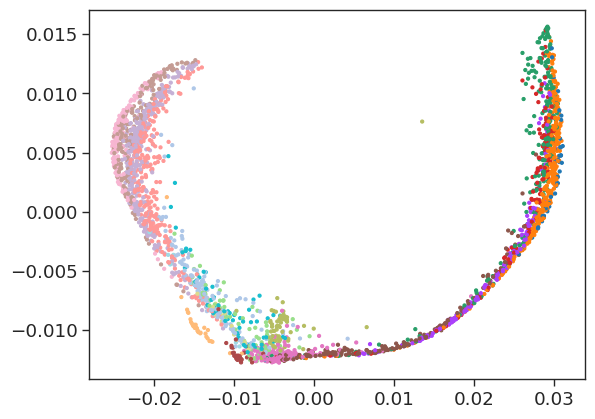

In [16]:
phate_operator = phate.PHATE(knn=30,n_jobs=-2)
Y_phate = phate_operator.fit_transform(adata.X)
plt.scatter(Y_phate[:,0], Y_phate[:,1], c=cell_clusters,s = 5)

In [17]:
pd.DataFrame(Y_phate).to_csv('paul.Y_phate.csv')

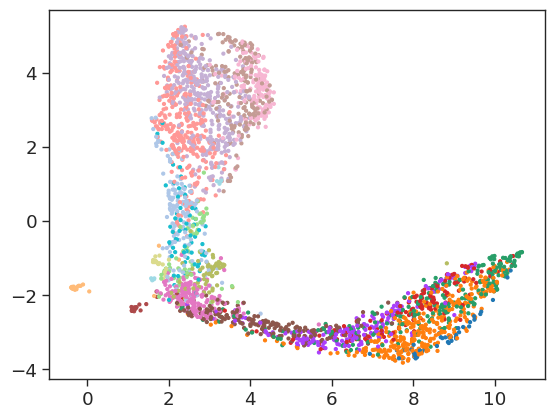

In [18]:
from umap import UMAP
reducer = UMAP() #   
Y_umap = reducer.fit_transform(adata.X)
plt.scatter(Y_umap[:,0],Y_umap[:,1], c=cell_clusters,s = 5)

In [19]:
pd.DataFrame(Y_umap).to_csv('paul.Y_umap.csv')

In [20]:
from sklearn import neighbors, decomposition, manifold

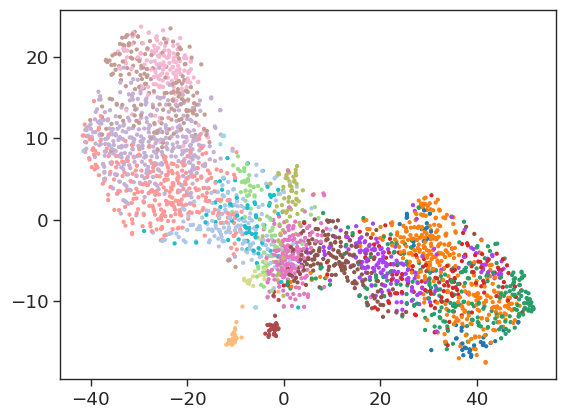

In [21]:
tsne_operator = manifold.TSNE(n_components=2)
Y_tsne = tsne_operator.fit_transform(adata.X)
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=cell_clusters,s = 5)

In [22]:
pd.DataFrame(Y_tsne).to_csv('paul.Y_tsne.csv')

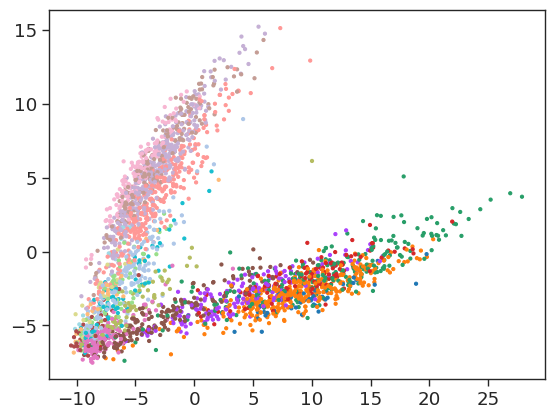

In [23]:
pca_operator = decomposition.PCA(n_components=2)
Y_pca = pca_operator.fit_transform(adata.X)
plt.scatter(Y_pca[:,0],Y_pca[:,1], c=cell_clusters,s = 5)

In [24]:
pd.DataFrame(Y_pca).to_csv('paul.Y_pca.csv')